# Cassini Trajectory Visualisation using Spice 🛰️ 🪐

### 1. Import all relevant modules

In [62]:
import spiceypy as spice
import matplotlib.pyplot as plt
import numpy as np

### 2. Load Kernels

In [63]:
spice.furnsh("Cassini_kernels/04135_04171pc_psiv2.bc")
spice.furnsh("Cassini_kernels/020514_SE_SAT105.bsp")
spice.furnsh("Cassini_kernels/030201AP_SK_SM546_T45.bsp")
spice.furnsh("Cassini_kernels/981005_PLTEPH-DE405S.bsp")
spice.furnsh("Cassini_kernels/cas_iss_v09.ti")
spice.furnsh("Cassini_kernels/cas_v37.tf")
spice.furnsh("Cassini_kernels/cas00084.tsc")
spice.furnsh("Cassini_kernels/cpck05Mar2004.tpc")
spice.furnsh("Cassini_kernels/naif0009.tls")

### 3. Convert datetime strings to ephemeris

In [64]:
step = 4000
utc = ['Jun 20, 2004', 'Dec 1, 2005']
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])

times = [x*(etTwo - etOne)/step + etOne for x in range(step)] 

### 4. Run skpos to compute the position of the Cassini spacecraft at multiple time points

In [65]:
cassini_positions, LightTimes = spice.spkpos('Cassini', times, 'J2000', 'NONE', 'SATURN BARYCENTER')
saturn_position, LightTimes = spice.spkpos('SATURN BARYCENTER', times, 'J2000', 'NONE', 'SATURN BARYCENTER')

spice.kclear()

### 5. Visualisation

Text(0.5, 0.92, 'Cassini Orbital Trajectory around Saturn')

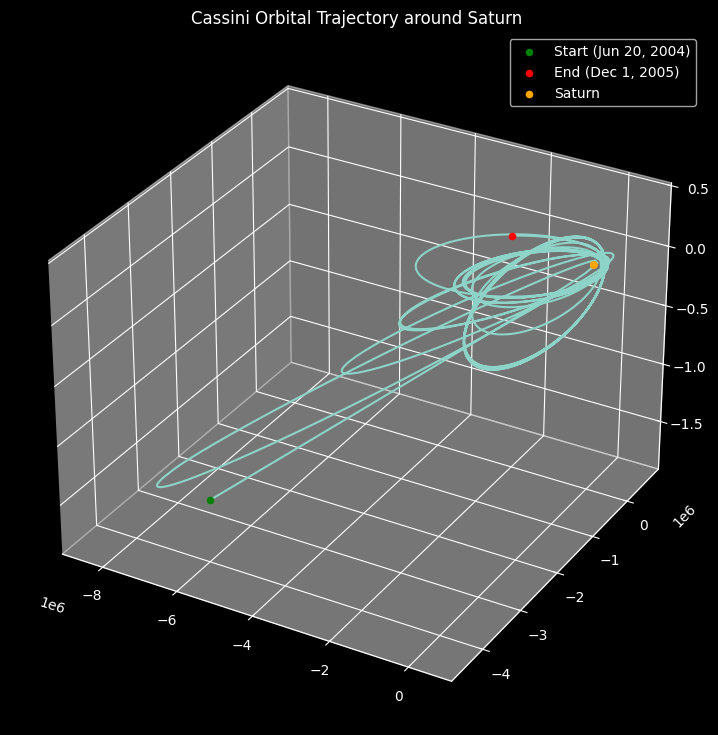

In [ ]:
plt.style.use('dark_background')
cassini_positions = np.asarray(cassini_positions).T
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(cassini_positions[0], cassini_positions[1], cassini_positions[2])

ax.scatter(cassini_positions[0][0], cassini_positions[1][0], cassini_positions[2][0], color='green', label='Start (Jun 20, 2004)')
ax.scatter(cassini_positions[0][-1], cassini_positions[1][-1], cassini_positions[2][-1], color='red', label='End (Dec 1, 2005)')
ax.legend()

ax.scatter(saturn_position[0], saturn_position[1], saturn_position[2], color='orange', label='Saturn')
ax.legend()
plt.title('Cassini Orbital Trajectory around Saturn')
